### Non-unitary weight

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve_lyapunov
import pylab

### GKD2

In [2]:
G = nx.DiGraph()

In [3]:
G.add_edge(1,0,weight=1)
G.add_edge(2,0,weight=0.7)

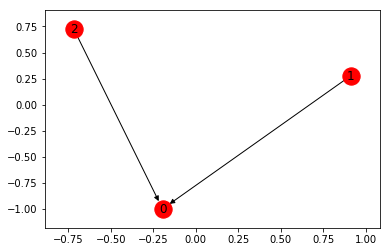

In [4]:
nx.draw_networkx(G)

In [5]:
A = nx.adjacency_matrix(G).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

1

In [6]:
def orth_matrix(A):
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    M, N = u.shape[0], vh.shape[1]
    rcond = np.finfo(s.dtype).eps * max(M, N)
    tol = np.amax(s) * rcond
    num = np.sum(s > tol, dtype=int)
    Q = vh[0:num,:].T.conj()
    return Q

In [7]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [8]:
L

matrix([[ 0. ,  0. ,  0. ],
        [-1. ,  1.7, -0.7],
        [ 0. ,  0. ,  0. ]])

In [9]:
Q

matrix([[-0.47781848,  0.81229142, -0.33447294]])

In [10]:
rL

matrix([[1.7]])

In [11]:
sigma

array([[0.29411765]])

In [12]:
x

matrix([[ 0.1343003 , -0.2283105 ,  0.09401021],
        [-0.2283105 ,  0.38812785, -0.15981735],
        [ 0.09401021, -0.15981735,  0.06580714]])

In [13]:
eqL

matrix([[ 0.38812785, -0.65981735,  0.2716895 ],
        [-0.65981735,  1.1216895 , -0.46187215],
        [ 0.2716895 , -0.46187215,  0.19018265]])

In [33]:
eqL[1,1]/x[1,1]

0.9653885021333934

In [15]:
1.7**2

2.8899999999999997

In [16]:
1/(2*1.7)

0.29411764705882354

In [17]:
neg_weight = lambda w: 0.5*w*w*(1 + w)/(1+w+w**2)

In [18]:
neg_weight(0.7)

0.19018264840182644

### GKD 1

In [19]:
G1 = nx.DiGraph()

In [20]:
G1.add_edge(0,1,weight=1)
G1.add_edge(0,2,weight=0.7)

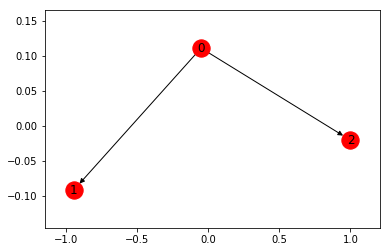

In [21]:
nx.draw_networkx(G1)

In [22]:
A = nx.adjacency_matrix(G1).transpose()
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A
np.linalg.matrix_rank(L)

2

In [23]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [24]:
L

matrix([[ 0. ,  0. ,  0. ],
        [-1. ,  1. ,  0. ],
        [-0.7,  0. ,  0.7]])

In [25]:
Q

matrix([[-0.78744197,  0.58067381,  0.20676815],
        [-0.21587453, -0.57400748,  0.78988201]])

In [26]:
rL

matrix([[ 0.9383287 , -0.06238753],
        [-0.23559261,  0.7616713 ]])

In [27]:
sigma

array([[0.53951066, 0.09999333],
       [0.09999333, 0.6873801 ]])

In [28]:
x

matrix([[ 0.80112045, -0.25770308, -0.54341737],
        [-0.25770308,  0.68347339, -0.42577031],
        [-0.54341737, -0.42577031,  0.96918768]])

In [29]:
eqL

matrix([[ 0.5783105 , -0.38812785, -0.19018265],
        [-0.38812785,  0.65981735, -0.2716895 ],
        [-0.19018265, -0.2716895 ,  0.46187215]])

In [31]:
eqL[0,0]/x[0,0]

0.721877095507232

In [32]:
eqL[1,1]/x[1,1]

0.9653885021333934